# needs up to 100gb ram

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad
import scipy as sci
import matplotlib.pyplot as plt

import os

In [2]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(10, 10))


plt.rcParams['axes.grid'] = False
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [3]:
sc.settings.figdir = "fig5"
scv.settings.figdir = "fig5"



In [8]:
# adata.layers["counts"][:5,:5].A

In [9]:
os.listdir('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/')

['adata_11_f3only.h5ad',
 'adata_f6_nonskin_withskinandwound.h5ad',
 'adata_prenatal_skin_all.h5ad',
 'adata_ibdsarah_skinjoint.h5ad',
 'adata_prenatal_skin_fbonly.h5ad',
 'adata_skin_gut_fetalonly.h5ad.integrated',
 'adata_lesional11.h5ad',
 'adata_lesional11.h5ad.lesionalonly',
 'adata_all.h5ad',
 'adata_crosstissue_allcelltypes.h5ad',
 'adata_fetal_and_adult_fbs.h5ad',
 'adata_mouse_normalized.h5ad',
 'adata_wound_fbs.h5ad',
 'adata_fbsonly_crosstissue.h5ad',
 'adata_f6_nonskin.h5ad',
 'adata_healthy_core.h5ad',
 'adata_xenium_fig2.h5ad',
 'adata_healthy_with_pericytes.h5ad',
 'adata_hlca_withnewclustering.h5ad',
 'adata_fbs_ibdTAURUS.h5ad',
 'adata_f3_nonskin_withskinandwound.h5ad',
 'adata_velo_integrated_new.h5ad.velo']

In [4]:
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_velo_integrated_new.h5ad.velo'
adata=sc.read_h5ad(PATH)
adata.shape
adata.X[:6,:6].A

array([[0.        , 0.        , 0.1830545 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.51057242, 0.        , 0.        ,
        0.        ],
       [0.58557305, 0.        , 0.33504976, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3427957 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.34780497,
        0.        ],
       [0.        , 0.        , 0.        , 0.3701338 , 0.        ,
        0.        ]])

# Pseudotime 5a

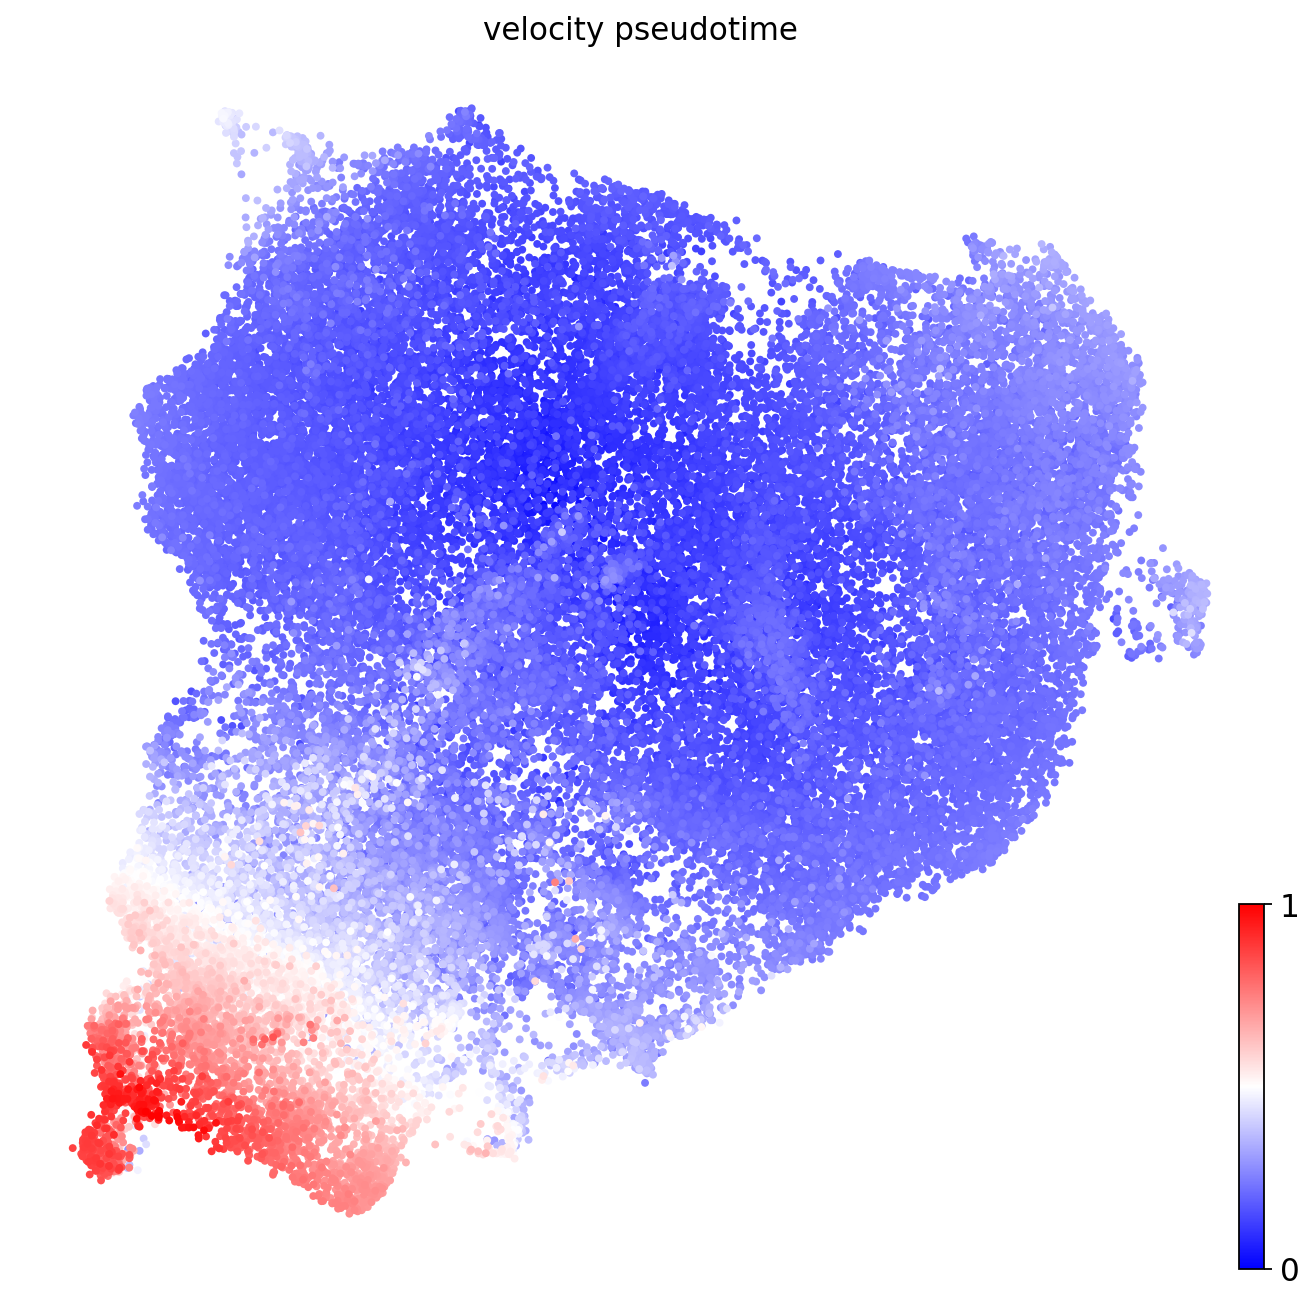

In [13]:
scv.tl.velocity_pseudotime(adata)

scv.pl.scatter(
    adata,
    color="velocity_pseudotime",
    basis="umap",
    s=50,
    cmap="bwr",
    show=False  
)

plt.gcf().savefig("fig5/fig5a_velocity_pseudotime_umapNEW.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.show()

In [14]:
import gc
gc.collect()

6718

# 5b PAGA plot

In [15]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
scv.tl.paga(adata, groups='test12')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:19) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


saving figure to file fig5/scvelo_fig5b_paga_nolabels_V2_NEW.pdf


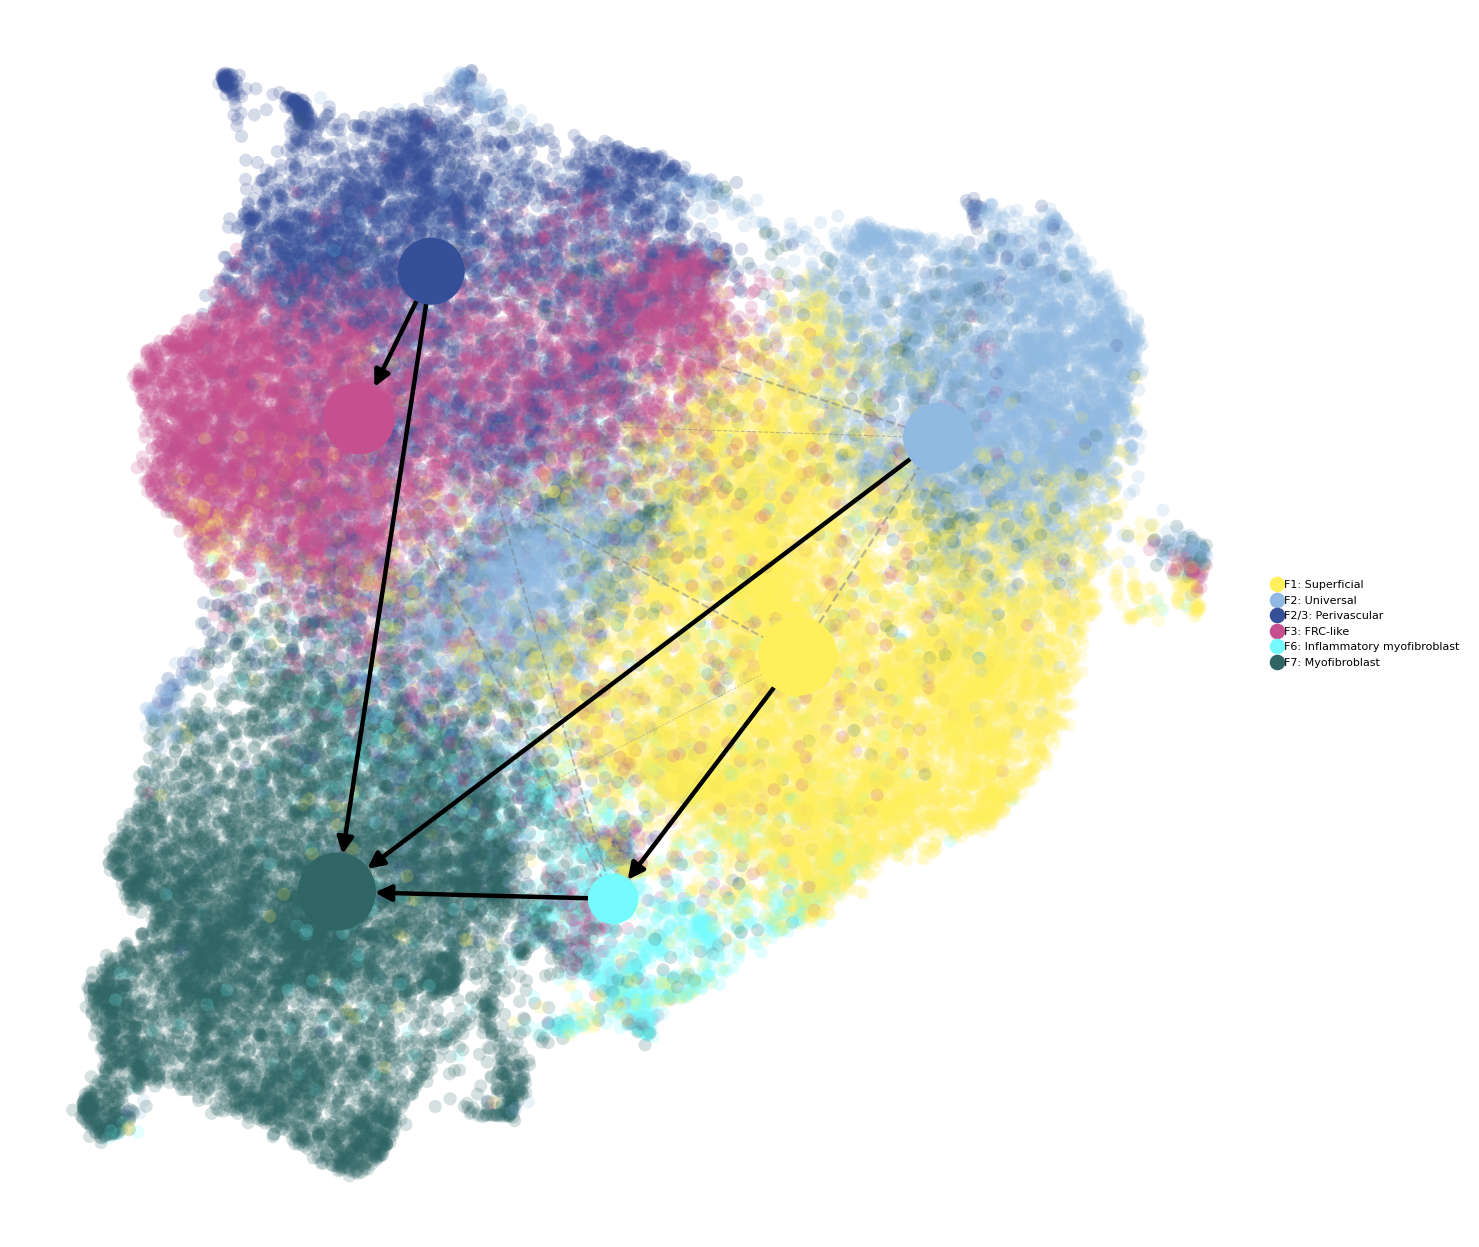

In [16]:

scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
           save="fig5b_paga_nolabels_V2_NEW.pdf"
           )

In [17]:


# PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_velo_integrated_new.h5ad.velo_FIXEDPAGA'
# adata.write(PATH)


In [18]:
# STOP

# 5c Velocity

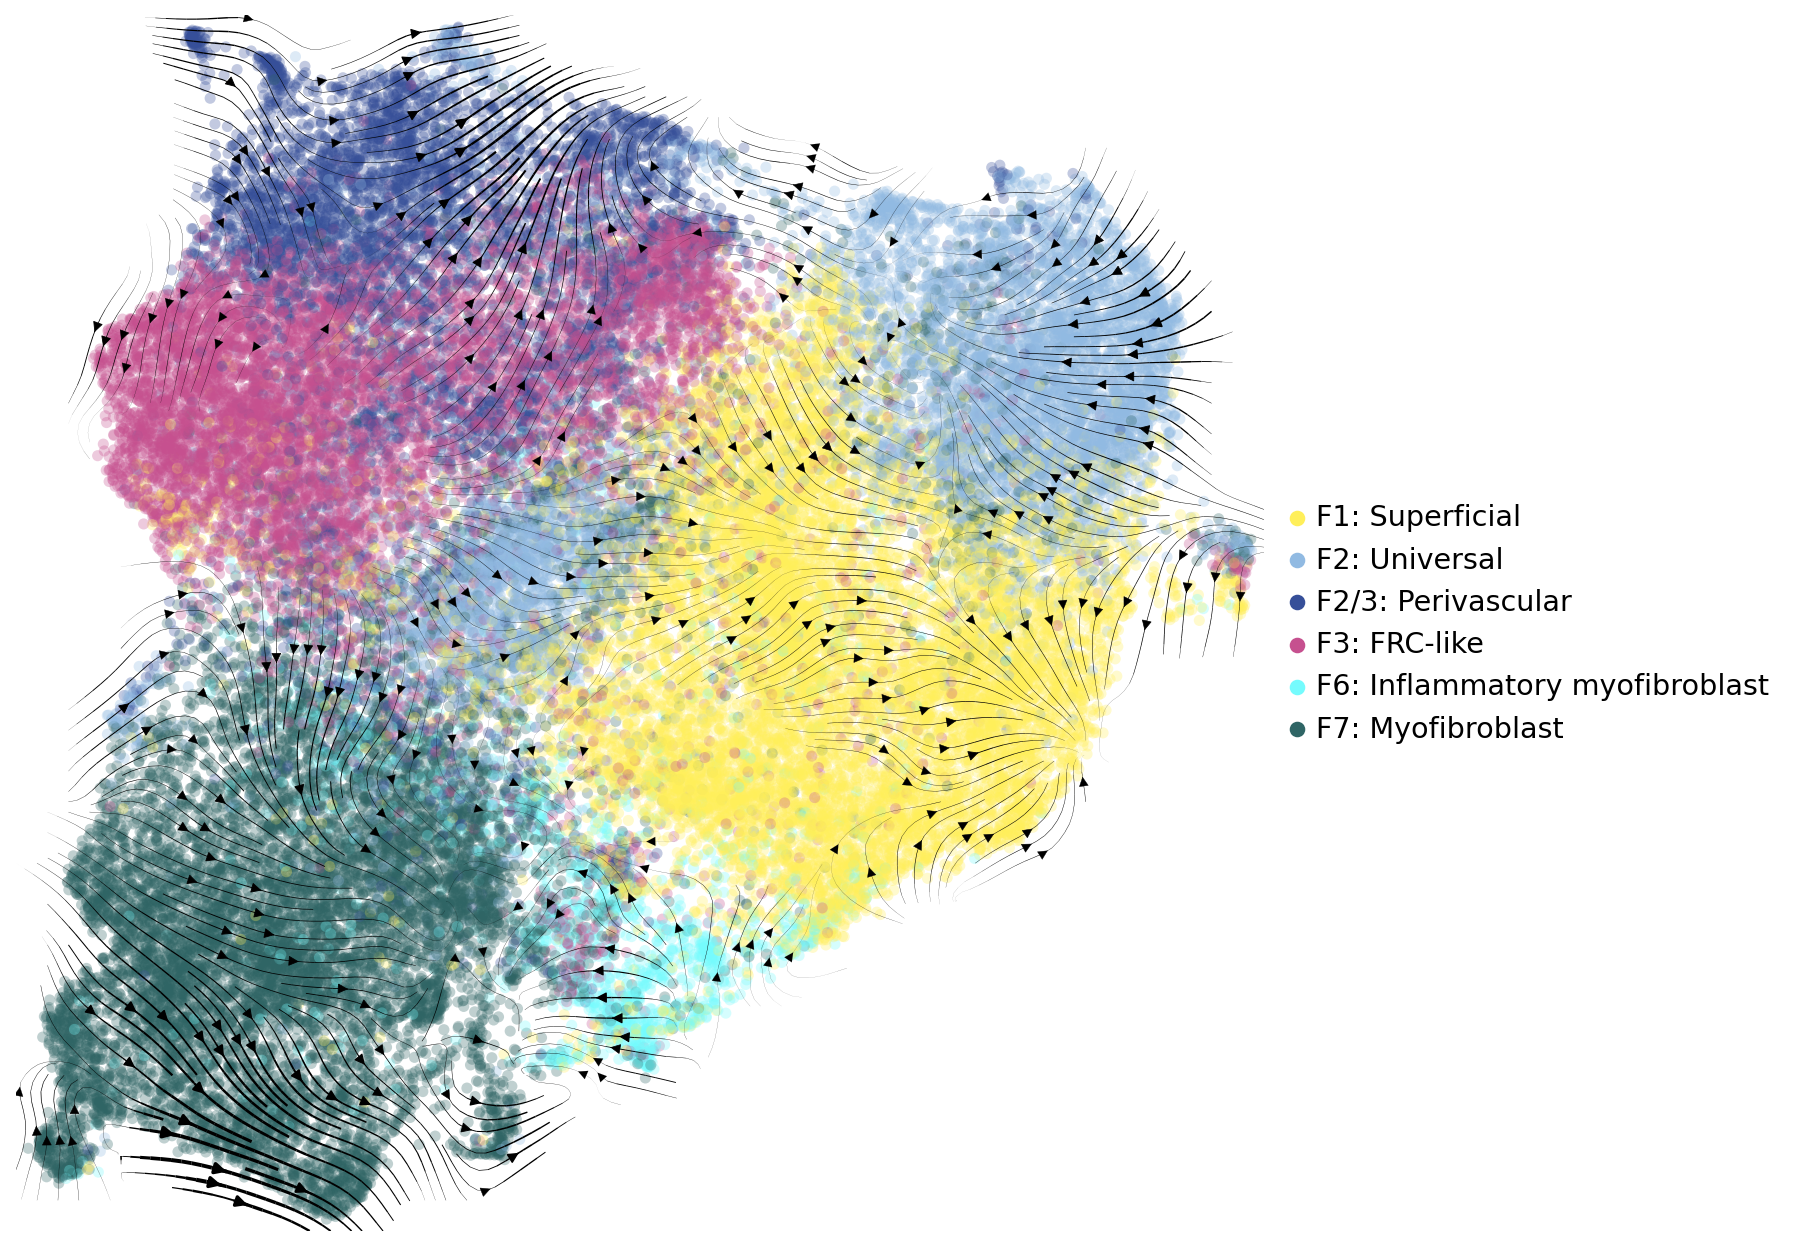

In [19]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    s=100,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc='right'#None
    
    
)

 

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file fig5/SUPP_fig5c_velocity_final.png


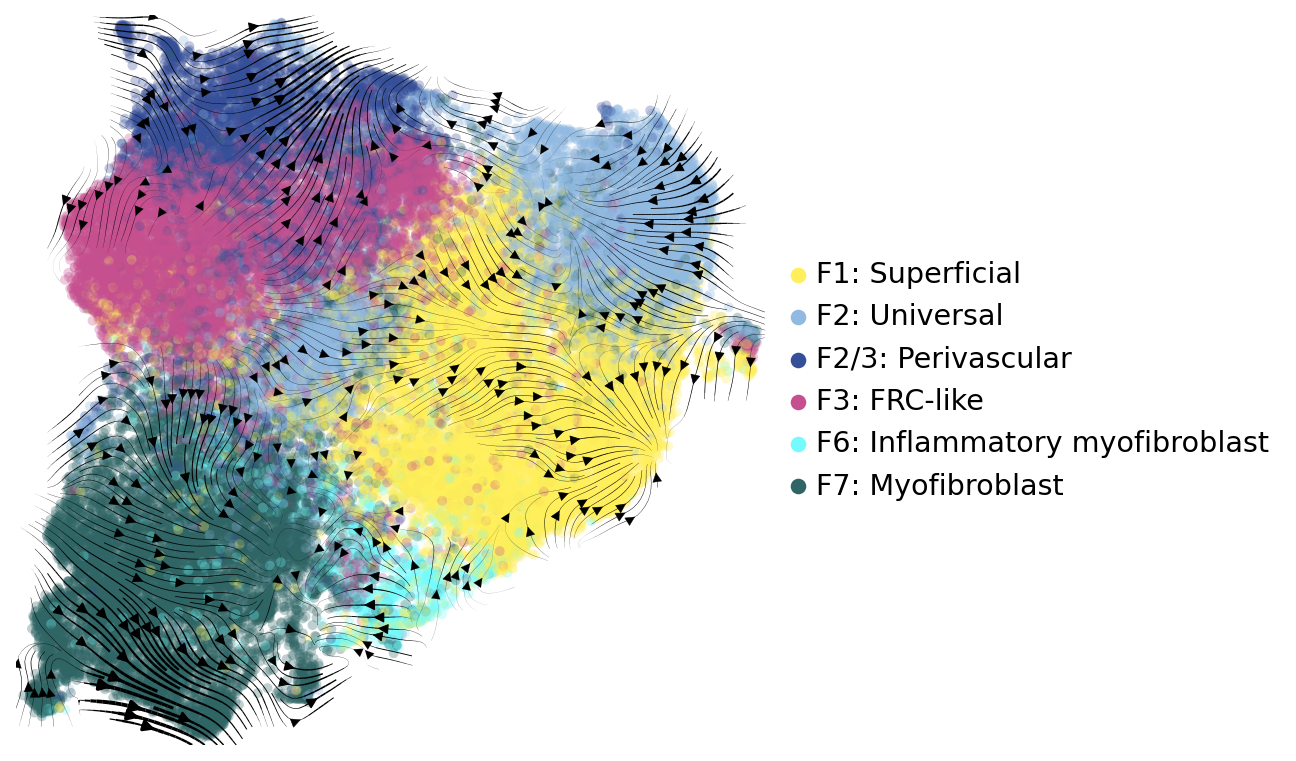

In [20]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(6,6))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.facecolor"] = "white"  # default is slightly off-white
plt.rcParams["figure.facecolor"] = "white"
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    s=80,
    save="sfig5/SUPP_fig5c_velocity_final.pdf",
    legend_loc='right'#None
    
    
)

 

NameError: name 'STOP' is not defined

# supp 7 mRNA velocity kernel

In [ ]:
sc.settings.figdir = "sfig7"
scv.settings.figdir = "sfig7"



100%|██████████| 45456/45456 [05:19<00:00, 142.23cell/s]


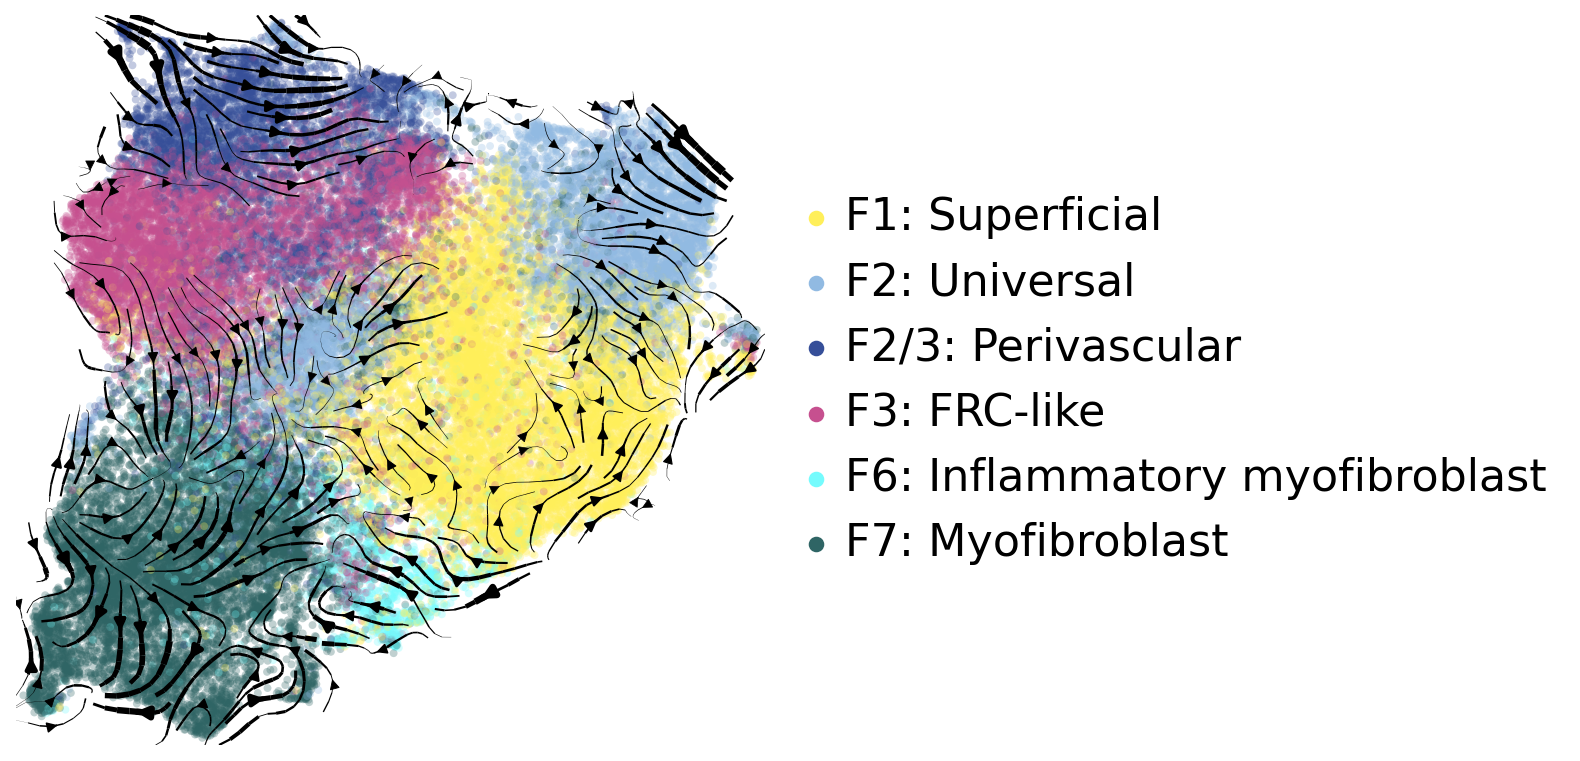

In [22]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()

vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()



In [26]:

vk.plot_projection(
    color=['test12'],
    s=80,
    title='',
    linewidth=2,
    density=4,
    legend_loc="right",
    legend_fontoutline=2,
    legend_fontsize=20,
    show=False  
)

# Grab the current figure and save
plt.gcf().savefig("sfig7/supp_velocity_kernel.png", dpi=300, bbox_inches="tight")#format="pdf")
plt.close()